<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
#VC Added
import sys
import os
import time

# Datastructures to help with reading and manipulating data
import numpy as np
import pandas as pd
# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
#VC Added
os.chdir("/content/drive/MyDrive")
#os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the File
data_original = pd.read_csv("bankchurn.csv")

## Data Overview

In [ ]:
#Copy the data onto another pd.
data = data_original.copy()
# let's view a sample of the data
data.sample(n=10, random_state=42)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.070,2,0,0,41788.370,0
4684,4685,15736963,Herring,623,France,Male,43,1,0.000,2,1,1,146379.300,0
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.000,2,1,0,58561.310,0
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.100,2,1,1,170679.740,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.980,1,1,1,114669.790,0
6340,6341,15659064,Salas,790,Spain,Male,37,8,0.000,2,1,1,149418.410,0
576,577,15761986,Obialo,439,Spain,Female,32,3,138901.610,1,1,0,75685.970,0
5202,5203,15713354,Morrice,597,Germany,Female,22,6,101528.610,1,1,0,70529.000,1
6363,6364,15593454,Lambert,678,Spain,Female,40,4,113794.220,1,1,0,16618.760,0
439,440,15690134,Hughes,464,Germany,Female,42,3,85679.250,1,1,1,164104.740,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Out of the 13 columns present in the dataset, 3 of them are categorical dataset while 10 of them are numerical in nature
- There are no missing values, since all the parameters have values

In [ ]:
data.isnull().sum()
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
RowNumber,0.000
CustomerId,0.000
Surname,0.000
CreditScore,0.000
Geography,0.000
Gender,0.000
Age,0.000
Tenure,0.000
Balance,0.000
NumOfProducts,0.000


- As stated above, there are no missing values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

- There are no duplicate values either. So the data looks clean

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


#Data Observations
- A total of 10,000 customers of data is present
- On an average the estimated salary is ~100K USD( assuming the currency). The highest salary being ~200k, while the lowest salary being 11.580( This seems to be most likely an allowance)
- The age of the customers is averaged out at 38, with the oldest being 92, while the youngest being 18
- The average credit score is ~650, with 850 being the higest along with 350 the lowest
- The average bank balance maintained by the customer is ~$76k
- The average Tenure of a customer is 5 years while the maximum being 10 years
- On an average a customer is using 1.5 Banking Products, while the highest being 4. The bank might want to consider increasing the adoption of usage of Banking products in the near future

Let us list all the categorical variables and try and understand the #occurances of the same

In [ ]:
# list of all categorical variables
cat_col = data.select_dtypes(include=['object', 'category']).columns

# printing the number of occurrences of each of the categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("\n")

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Gender
Male      5457
Female    4543
Name: count, dtype: int64




- France seems to have the higest customers followed by equal number of customers from Spain and Germany
- There is an equal spread of customers across both the genders

In [ ]:
# enrollee_id is unique for each candidate and might not add value to modeling
data.drop(["RowNumber", "Surname", "CustomerId"], axis=1, inplace=True)

 - Lets drop the customer id, surname and the rownumber. They are not of much use for us

In [ ]:
#Lets now again see how the table looks after dropping the categorical variable - Surname and the numeric variable - RowNumber
data.sample(n=10, random_state=42)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,596,Germany,Male,32,3,96709.070,2,0,0,41788.370,0
4684,623,France,Male,43,1,0.000,2,1,1,146379.300,0
1731,601,Spain,Female,44,4,0.000,2,1,0,58561.310,0
4742,506,Germany,Male,59,8,119152.100,2,1,1,170679.740,0
4521,560,Spain,Female,27,7,124995.980,1,1,1,114669.790,0
6340,790,Spain,Male,37,8,0.000,2,1,1,149418.410,0
576,439,Spain,Female,32,3,138901.610,1,1,0,75685.970,0
5202,597,Germany,Female,22,6,101528.610,1,1,0,70529.000,1
6363,678,Spain,Female,40,4,113794.220,1,1,0,16618.760,0
439,464,Germany,Female,42,3,85679.250,1,1,1,164104.740,0


##Functions Defined for EDA and others

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf


## Exploratory Data Analysis

### Bivariate Analysis

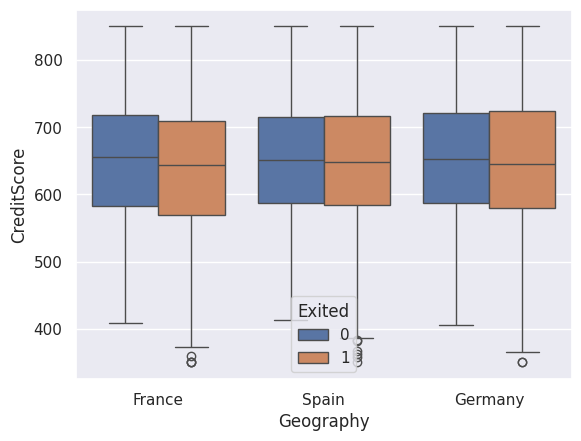

In [ ]:
sns.boxplot(data=data, y='CreditScore', x='Geography', hue='Exited');
#distribution_plot_wrt_target(data_original, "CreditScore","Attrition_Flag")

- From the above boxplot, we see that the estimated salary across the various countries remains the same

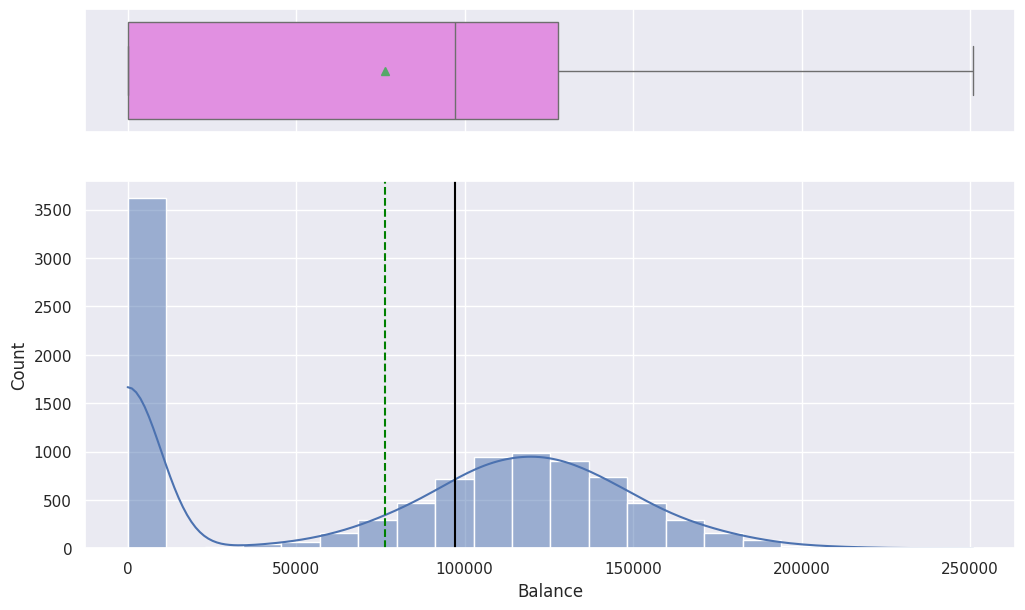

In [ ]:
histogram_boxplot(data, "Balance", kde=True)
#def histogram_boxplot(data_original, 'feature', figsize=(12, 7), kde=False, bins=None)

- From the histogram and boxplot, we observe that there is a uniform distribution of the balance nicely spread across with an average of $76485.889 (as we observed in the data overview)
- Surprisingly there are about 3500 customers with very minimal balance


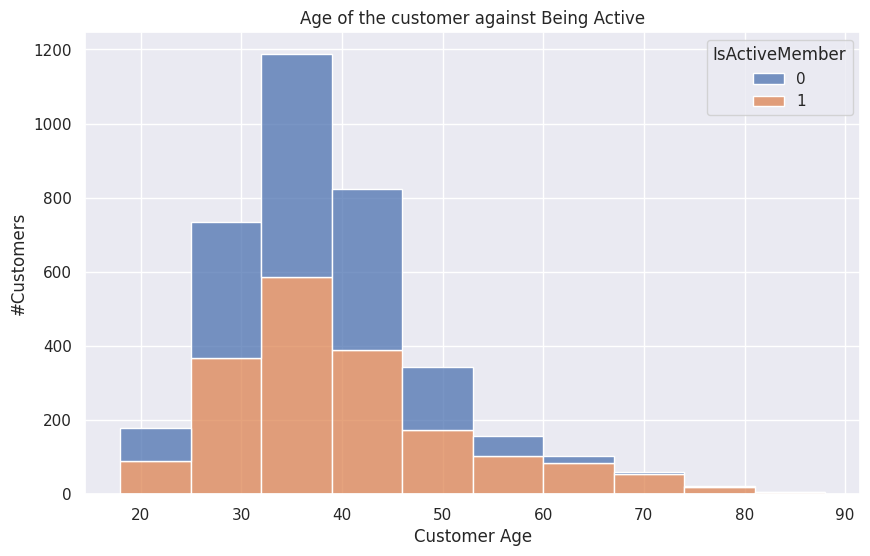

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered, x='Age', hue='IsActiveMember', multiple='stack', bins=10)
plt.title('Age of the customer against Being Active')
plt.xlabel('Customer Age')
plt.ylabel('#Customers')
plt.show()

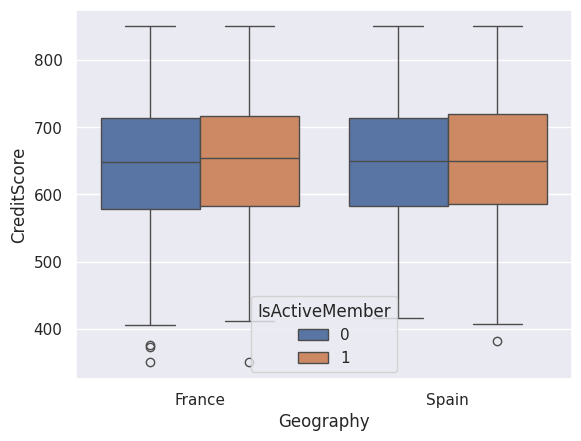

In [ ]:
sns.boxplot(data=data_filtered, y='CreditScore', x='Geography', hue='IsActiveMember');

- We see that half of them are active while the other half are inactive and they seem to have a decent Credit score
**Since their credit score is equally good, it implies these customers are likely to exit the bank**

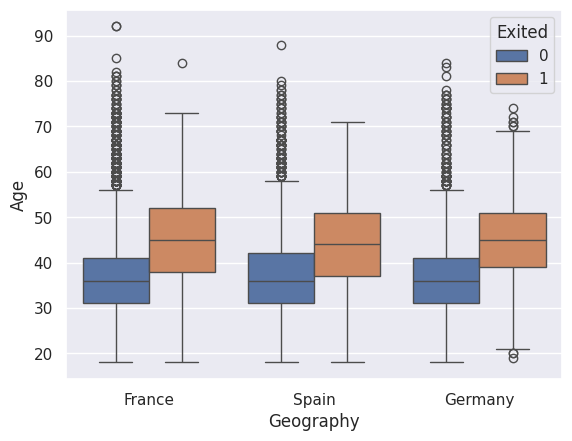

In [ ]:
sns.boxplot(data=data_original, y='Age', x='Geography', hue='Exited');

- The customers are spread across equally between France, Spain and Germany
- The Exited customer's age seems to be higher than the younger ones across all the countries
- Interestingly across all the countries, high volumes of senior citizens seems to be holding the account with the bank.

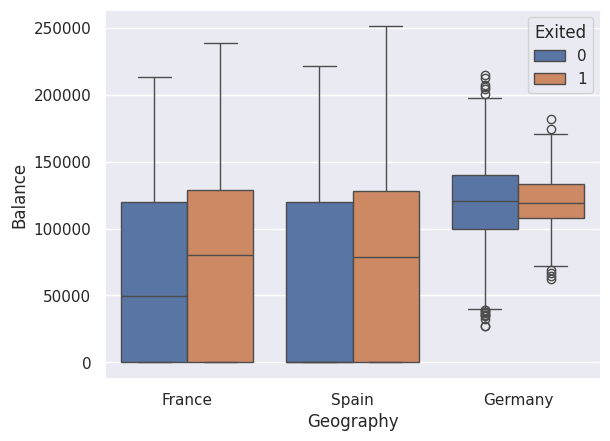

In [ ]:
sns.boxplot(data=data_original, y='Balance', x='Geography', hue='Exited');

###Correlation Matrix

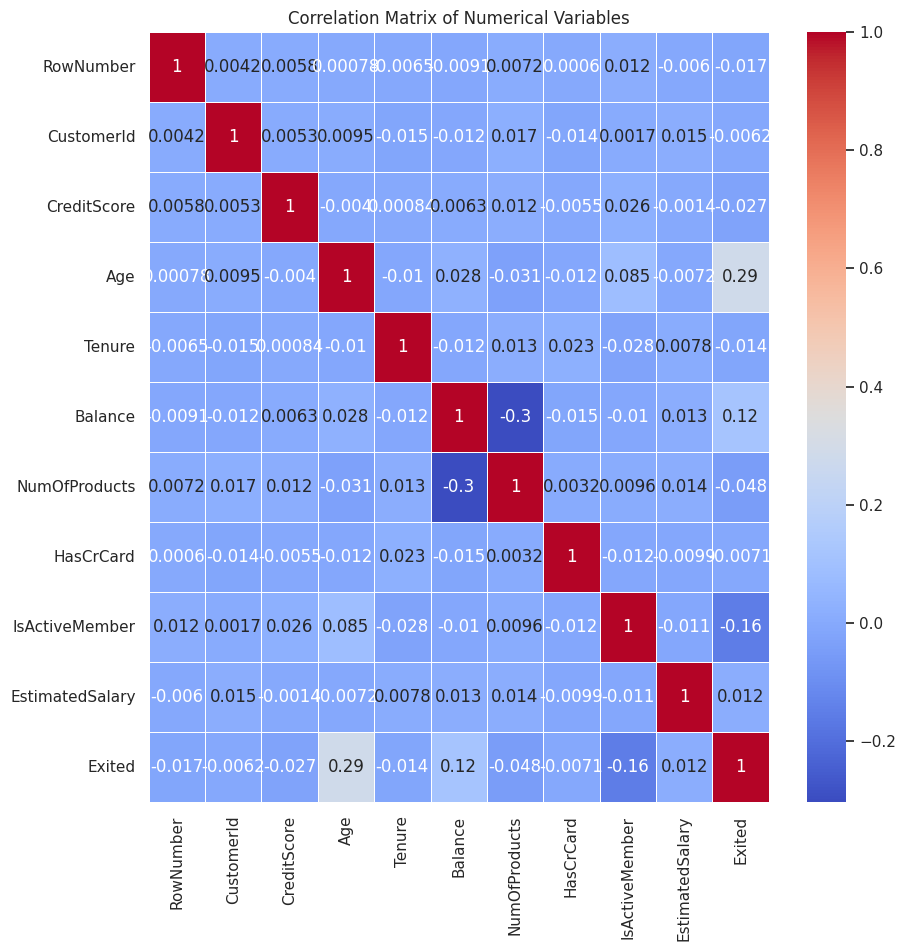

In [ ]:
# Select only numerical columns
numerical_columns = data_original.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data_original[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

- When we observe the correlation across, we see that correlation between 'Exited' is the highest with Age and Balance: .29 and .12 respectively.
- We also see strong correlation between Balance and NumOfProducts. Hence it is important to retain customers that are using higher number of banking products, since the correlation seems to be a bit stronger.
- Consdiering the fact that the Age and Exited are relatively strongly correlated, possibly it makes sense for the bank to look into mid-age (between 40 - 50) and dole out specific offers for retention

## Data Preprocessing

### Data Normalization and Feature Encoding

In [ ]:
#Lets encode the labels
# Label Encoding for Gender (binary categorical)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# One-Hot Encoding for Geography (multi-class categorical)
data = pd.get_dummies(data, columns=['Geography'], drop_first=False)

# Display the first few rows of the updated dataframe
print(data.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2      0.000              1          1   
1          608       0   41       1  83807.860              1          0   
2          502       0   42       8 159660.800              3          1   
3          699       0   39       1      0.000              2          0   
4          850       0   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1       101348.880       1              True   
1               1       112542.580       0             False   
2               0       113931.570       1              True   
3               0        93826.630       0              True   
4               1        79084.100       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2              False            False 

In [ ]:
#Lets do feature scaling. Lets take the numerical columns for the same
# Select numerical columns for scaling
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the Standard Scaler
scaler = StandardScaler()

# Apply scaling to numerical columns of the dataset.
# Basic reminder -Fit and transform applies to the training data set alone, while transform is needed for validationn and test data sets.
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows after preprocessing
print(data.head())

   CreditScore  Gender   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0       -0.326       0 0.294  -1.042   -1.226         -0.912          1   
1       -0.440       0 0.198  -1.388    0.117         -0.912          0   
2       -1.537       0 0.294   1.033    1.333          2.527          1   
3        0.502       0 0.007  -1.388   -1.226          0.808          0   
4        2.064       0 0.389  -1.042    0.786         -0.912          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1            0.022       1              True   
1               1            0.217       0             False   
2               0            0.241       1              True   
3               0           -0.109       0              True   
4               1           -0.365       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2              False            False  
3   

In [ ]:
#Lets just save the pre-processed Data onto a dataset
data.to_csv("Bank_Churn_Preprocessed.csv")

###Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

 - Creating a dataframe to store all the model results

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results_Frame = pd.DataFrame(columns=columns)

Final Check, before we start building the models

In [ ]:
print(data.dtypes)  # This will show the data type of each column

NameError: name 'data' is not defined

In [ ]:
#OPTIONAL - PLS CHECK AND RUN THE FOLLOWING LINE OF CODE##
#We see that we had created a BalanceCategory earlier to understand some aspects of Data.
#Lets drop the column now, since our objective is achieved
data.drop(["BalanceCategory"],axis=1, inplace=True)

### Train-validation-test Split

In [ ]:
# Separate the features (X) and the target (y)
X = data.drop('Exited', axis=1)  # Features (everything except the target)
y = data['Exited']               # Target (Exited column)

# Step 1: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Further split the training set into training and validation sets (70% train, 30% validation of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

# Check the shape of the splits
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (5600, 12)
Validation set shape: (2400, 12)
Test set shape: (2000, 12)


## Model Building

##Model Evaluation Criteria

 - When building a neural network classifier to predict customer churn for a bank, the choice of model criteria is crucial to align with the business objectives. Here's an outline of the key criteria that should guide the model's development

The model can do two specific wrong predictions here:
1) Predict wrongly that the customer is leaving the bank, when he is  not.
2) Predict wrongly that the customer will stay, when he is actually planning to leave the bank.

1. Recall as a Priority:

    - In the context of customer churn, it is more critical to correctly identify customers who are likely to leave (churners) than it is to avoid false positives.
    - Missing out on a customer who will churn (False Negative) could result in lost revenue and missed opportunities to retain them
    - Hence, maximizing Recall is often prioritized.
    -** Metrics to be focussed being - Highest Recall would be considered.**
2. Precision:
   -High precision is important, when the bank predicts that the customer will leave, it must be correct.
   - In practice, high false positives could lead to unnecessary retention efforts, which can be costly. The precision-recall tradeoff should be carefully balanced.

##Model-0: Neural Network with Gradient Descent optimizer

**Model-0: Rationale**
 - We shall start with the simplest of the model, with only input and output layer, with no hidden layer
 - We want to use Gradient Descent as the optimizer
 - Epochs to be set to 10, which means the model will pass over the entire data 10 times

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

# Step 1: Define the neural network architecture
model = Sequential()

# Input layer and first hidden layer
# Info: A Dense layer is a fully connected neural network layer where each neuron (node) in the layer is connected to every neuron in the previous layer.
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Output layer (binary classification)
#Info - Since this is a binary classification problem (predicting whether a customer will churn or not), we only need one neuron in the output layer
#to output a single value that will represent the probability of the customer churning.
#Info - Sigmoid activation is commonly used for binary classification tasks because it outputs a value between 0 and 1, which can be interpreted as a probability
model.add(Dense(units=1, activation='sigmoid'))

# Step 2: this simulates the most basic Gradient Descent Optimizer.
#gd_optimizer = SGD(learning_rate=0.01)
gd_optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=False)

model.compile(optimizer=gd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
##################################################################################
start = time.time()
# Step 3: Train the model with batch Gradient Descent (batch_size = full dataset)
history_gd = model.fit(X_train, y_train, epochs=10, batch_size=X_train.shape[0],  # Full-batch GD
                        validation_data=(X_val, y_val), verbose=1)

end = time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - accuracy: 0.3489 - loss: 0.7597 - val_accuracy: 0.3550 - val_loss: 0.7602
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3509 - loss: 0.7591 - val_accuracy: 0.3554 - val_loss: 0.7596
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.3511 - loss: 0.7585 - val_accuracy: 0.3571 - val_loss: 0.7590
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3530 - loss: 0.7579 - val_accuracy: 0.3587 - val_loss: 0.7584
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3543 - loss: 0.7573 - val_accuracy: 0.3587 - val_loss: 0.7578
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3554 - loss: 0.7567 - val_accuracy: 0.3604 - val_loss: 0.7572
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3555 - loss: 0.7561 - val_accuracy: 0.3613 - val_loss: 0.7566
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3564 - loss: 0.7555 - val_accuracy: 0.3613 - val_loss: 0.

In [ ]:
################################Training Model Performance########################
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.362,0.362,0.687,0.379


In [ ]:
################################Training Model Performance########################
model_0_valid_perf = model_performance_classification(model, X_val, y_val)
model_0_valid_perf

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.364,0.364,0.682,0.384


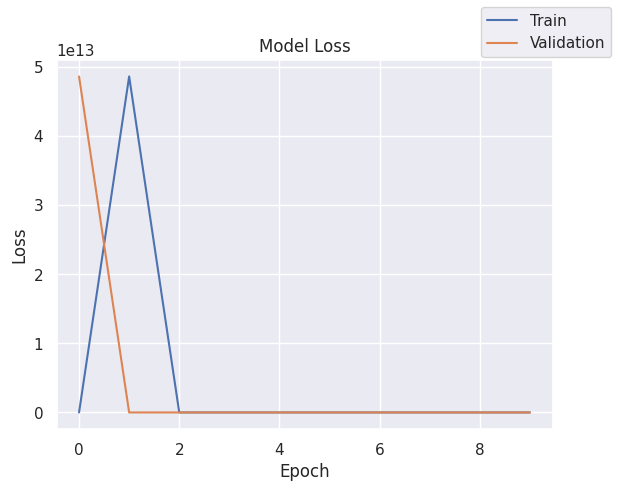

In [ ]:
plot(history_gd,'loss')

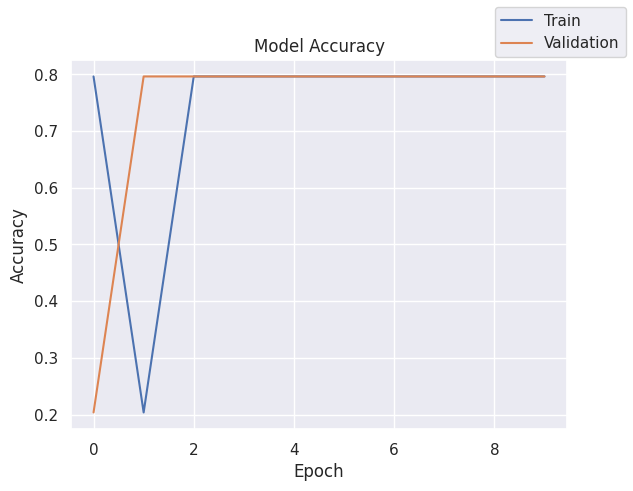

In [ ]:
plot(history_gd,'accuracy')

In [ ]:
results_Frame.loc[0] = [0,'-','-',25,50000,history_gd.history["loss"][-1],history_gd.history["val_loss"][-1],history_gd.history["accuracy"][-1],history_gd.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620


## Model 0: Model Evaluation
**Model 0 : Model Evaluation:**
- It is a basic model with no hidden layers and a simple logical regression model
- There is no intermediate processing or feature extraction

**Recall and Precision:**:
- The recall is at 0.362(training) and .364(validation) which is extremely low. Hence not a trustable model

**Loss and Accuracy**
- The loss across all the 10 epochs is above 0.75, that is extremely high. So might not be a suitable model

**OverFitting**
 - NA, given the low scores

**Time Efficiency**
- The time taken is fast considering the fact that this is a simple model with no hidden layers.

## Model-1: Neural Network with SGD Optimizer

**Model-1: Rationale**
 - We saw that Model-0 had no hidden layers, provided a low performance with less execution time.
 - However it may not capture complex patterns in the data. Hence there is a need to introduce hidden layers
 - Leveraging hidden layers with SGD optimizationn might results in a more flexible neural network

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

## Step 1: Initialize the model
model = Sequential()

# Step 2: Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Input and 1st hidden layer

model.add(Dense(units=32, activation='relu'))  # 2nd hidden layer


# Step 3: Add output layer (using 'sigmoid' for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Step 4: Compile the model with SGD
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.0) #When to finetune the learning rate? Lets see that later

##################################################################################
start = time.time()
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Print how the model looks now.
model.summary()
# Step 5: Train the model using SGD
history_sgd = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32)
end = time.time()

print("Time taken in seconds ",end-start)
##################################################################################

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6971 - loss: 0.5963 - val_accuracy: 0.7962 - val_loss: 0.4841
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8057 - loss: 0.4709 - val_accuracy: 0.7954 - val_loss: 0.4601
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4497 - val_accuracy: 0.7954 - val_loss: 0.4452
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.4409 - val_accuracy: 0.7983 - val_loss: 0.4349
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 0.4288 - val_accuracy: 0.8029 - val_loss: 0.4274
Epoch 6/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4157 - val_accuracy: 0.8079 - val_loss: 0.4217
Epoch 7/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 0.4107 - val_accuracy: 0.8150 - val_loss: 0.4160
Epoch 8/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.3899 - val_accuracy: 0.

In [ ]:
##################################################################################

model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.857,0.857,0.849,0.838


In [ ]:
#X_train, X_val, y_train, y_val
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.853,0.853,0.847,0.830


In [ ]:
plot(history_sgd,'loss')

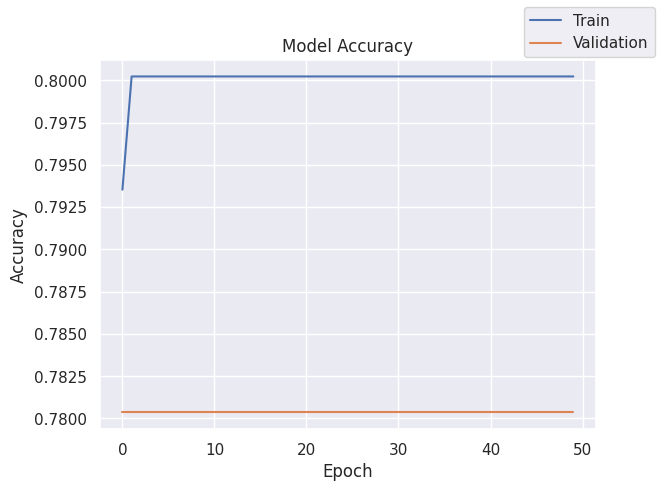

In [ ]:
plot(history_sgd,'accuracy')

In [ ]:
results_Frame.loc[1] = [2,[64,32],'relu, relu',25,32,history_sgd.history["loss"][-1],history_sgd.history["val_loss"][-1],history_sgd.history["accuracy"][-1],history_sgd.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100


##Model 1 : Model Evaluation:



**Recall and Precision:**

  - The recall has shot up to .857/.853 which is heartening, while the precision hovers around .849 & .847 for training and validation data respectively.

**Loss and Accuracy**

**Loss**:
 - The loss seems to have bettered and has dropped down to .346 & .371
 - The loss stabilizes between 15 - 17th epochs and stays pretty constant.
 - This implies that the model is performing better and is able understand better patterns

**Accuracy**:
  - The model does seem to be performing good with accuracy about 0.854 and .853 for training and validation respectively.

**OverFitting**
 - The training and the validation seems to be very close and there is not much signs of over-fitting.


**Time Efficiency**
 - The model takes longer time of 16.1 seconds as compared to the Model-0 that was super fast at 1.6 seconds. But then this looks acceptable given the good performance

## Model-2: SGD Optimizer with an additional hidden layer
Let us try to add another hidden layer and tweak the learning rate to see how the performance varies.
- We will add one more hidden Layer, along with a drop-out.
- Along with that we will tweak the learning rate to see if accuracy improves.
- The timing may extend a little more

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
## Step 1: Initialize the model
model = Sequential()

# Step 2: Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Input and 1st hidden layer
model.add(Dropout(0.3))  # Dropout after the 1st hidden layer (30% of neurons will be turned off)


model.add(Dense(units=32, activation='relu'))  # 2nd hidden layer
model.add(Dropout(0.3))  # Dropout after the 2nd hidden layer

model.add(Dense(units=16, activation='relu'))  # 3rd hidden layer
model.add(Dropout(0.3))  # Dropout after the 3rd hidden layer


# Step 3: Add output layer
model.add(Dense(units=1, activation='sigmoid')) #(using 'sigmoid' for binary classification)

# Step 4: Compile the model with SGD
sgd_optimizer = SGD(learning_rate=0.001) #When to finetune the learning rate? Lets see that later

#Compile and run the model
start = time.time()
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#Print how the model looks now.
model.summary()

# Step 5: Train the model using SGD
history_sgd = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=25, batch_size=32)
end = time.time()

print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2742 - loss: 0.8087 - val_accuracy: 0.3483 - val_loss: 0.7216
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3775 - loss: 0.7393 - val_accuracy: 0.5904 - val_loss: 0.6809
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5381 - loss: 0.6912 - val_accuracy: 0.7638 - val_loss: 0.6513
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - loss: 0.6618 - val_accuracy: 0.7937 - val_loss: 0.6272
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7254 - loss: 0.6337 - val_accuracy: 0.7962 - val_loss: 0.6076
Epoch 6/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.6114 - val_accuracy: 0.7962 - val_loss: 0.5907
Epoch 7/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7785 - loss: 0.6025 - val_accuracy: 0.7962 - val_loss: 0.5766
Epoch 8/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7831 - loss: 0.5891 - val_accuracy: 0.

In [ ]:
##################################################################################

model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796,0.796,0.634,0.706


In [ ]:
model_2_valid_perf = model_performance_classification(model, X_val, y_val)
model_2_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796,0.796,0.634,0.706


In [ ]:
#results.loc[2] = [0,'-','-',10,50000,history_sgd.history["loss"][-1],history_sgd.history["val_loss"][-1],history_sgd.history["accuracy"][-1],history_sgd.history["val_accuracy"][-1],round(end-start,2)]
results_Frame.loc[2] = [3,[64,32,16],'relu, relu, relu',25,32,history_sgd.history["loss"][-1],history_sgd.history["val_loss"][-1],history_sgd.history["accuracy"][-1],history_sgd.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580


## Model-3: SGD Optimizer with a larger batch size

In [ ]:
#Compile and run the model
start = time.time()
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Step 5: Train the model using SGD
history_sgd = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=25, batch_size=128)
end = time.time()

print("Time taken in seconds ",end-start)

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7949 - loss: 0.5176 - val_accuracy: 0.7962 - val_loss: 0.5001
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7864 - loss: 0.5186 - val_accuracy: 0.7962 - val_loss: 0.4997
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7926 - loss: 0.5255 - val_accuracy: 0.7962 - val_loss: 0.4994
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7933 - loss: 0.5175 - val_accuracy: 0.7962 - val_loss: 0.4991
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7931 - loss: 0.5155 - val_accuracy: 0.7962 - val_loss: 0.4987
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.5119 - val_accuracy: 0.7962 - val_loss: 0.4984
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7904 - loss: 0.5217 - val_accuracy: 0.7962 - val_loss: 0.4981
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7883 - loss: 0.5198 - val_accuracy: 0.7962 - val_loss

In [ ]:
##################################################################################

model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796,0.796,0.634,0.706


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_val, y_val)
model_3_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796,0.796,0.634,0.706


In [ ]:
#results.loc[2] = [0,'-','-',10,50000,history_sgd.history["loss"][-1],history_sgd.history["val_loss"][-1],history_sgd.history["accuracy"][-1],history_sgd.history["val_accuracy"][-1],round(end-start,2)]
results_Frame.loc[3] = [3,[64,32,16],'relu, relu, relu',25,128,history_sgd.history["loss"][-1],history_sgd.history["val_loss"][-1],history_sgd.history["accuracy"][-1],history_sgd.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.511,0.493,0.796,0.796,7.720


##Model 2 & 3 : Model Evaluation:



- We ran two sub-models with SGD optimizer to see how the modificationns affected the performance of the Neural Network

**Recall and Precision:**
  - The recall is at .796 for both train and test data, along with precision at .634.

**Loss and Accuracy**

**Loss**:
 - The training loss for Model 2 and Model3 almost are similar.
 - Training vs validation losses for model 2 is at .513 vs .500 while for Model 3 it stands at .522 and .493.
 - However overall as compared to Model-2, the losses have increased.

**Accuracy**:
 - The accuracy of the model remains stagnant throughout the iterations across Model-1, Model-2 and Model-3.
 - This is indication that adding the third hidden layer did not increase the model's ability to classify the training data better.

**OverFitting**
 - The training and the validationn seems to be very close and there is not much signs of over-fitting.

**Time Efficiency**
 - While Model-1 and Model-2 aimed at a slower learning rate with smaller batch size, Model-3 increased the batch size to 128. We see a considerable decrease in the execution time that is understandable.


## Model-4 : Neural Network with Adam Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
## Step 1: Initialize the model
model = Sequential()

# Step 2: Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Input and 1st hidden layer

model.add(Dense(units=32, activation='relu'))  # 2nd hidden layer

model.add(Dense(units=16, activation='relu'))  # 3rd hidden layer


# Step 3: Add output layer
model.add(Dense(units=1, activation='sigmoid')) #(using 'sigmoid' for binary classification)

# Step 4: Compile the model with Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile and run the model
start = time.time()
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Train the model using Adam optimizer
history_adam  = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=25, batch_size=16)
end = time.time()

print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6646 - loss: 0.5845 - val_accuracy: 0.8250 - val_loss: 0.3984
Epoch 2/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8476 - loss: 0.3647 - val_accuracy: 0.8487 - val_loss: 0.3737
Epoch 3/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3394 - val_accuracy: 0.8517 - val_loss: 0.3617
Epoch 4/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3396 - val_accuracy: 0.8521 - val_loss: 0.3653
Epoch 5/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3338 - val_accuracy: 0.8508 - val_loss: 0.3620
Epoch 6/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3280 - val_accuracy: 0.8554 - val_loss: 0.3633
Epoch 7/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.3349 - val_accuracy: 0.8562 - val_loss: 0.3618
Epoch 8/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3187 - val_accuracy: 0.

In [ ]:
##################################################################################

model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.888,0.888,0.884,0.879


In [ ]:
model_4_valid_perf = model_performance_classification(model, X_val, y_val)
model_4_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.854,0.854,0.843,0.841


In [ ]:
results_Frame.loc[4] = [3,[64,32,16],'relu, relu, relu',25,16,history_adam.history["loss"][-1],history_adam.history["val_loss"][-1],history_adam.history["accuracy"][-1],history_adam.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.511,0.493,0.796,0.796,7.720
4,3,"[64, 32, 16]","relu, relu, relu",25,16,0.289,0.373,0.880,0.854,31.690


##Model 4 : Model Evaluation


**Recall and Precision:**

  - The recall shoots up to .888 and .854 in train and validation data respectively. The model seems to be performing well with good predictability

**Loss and Accuracy**

**Loss**:
 - Train Loss (0.289) and Validation Loss (0.373) for Model-4 have decreased and they look good. This suggests that the Adam optimizer has achieved a lower loss compared to the previous SGD-based models
 - The lower loss might be due to Adam’s nature of adaptive learning rates, which may be ideal for this specific dataset at the current learning rate

**Accuracy**:
 - The train accuracy (0.888) and validation accuracy (0.854) are reliable numbers to trust the model

**OverFitting**
 - The model is not overfitting, since there is a healthy gap between the train and test results.

**Time Efficiency**
 - Model-4 took higher time to finish the computing, and it is understandable considering the fact that Adam optimizer is computationally intensive in nature, owing to its adaptive learning properties

## Model 5: Neural Network with Adam Optimizer and Dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
## Step 1: Initialize the model
model = Sequential()

# Step 2: Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Input and 1st hidden layer
model.add(Dropout(0.3))  # Dropout after the 1st hidden layer (30% of neurons will be turned off)


model.add(Dense(units=32, activation='relu'))  # 2nd hidden layer
model.add(Dropout(0.3))  # Dropout after the 2nd hidden layer

model.add(Dense(units=16, activation='relu'))  # 3rd hidden layer
model.add(Dropout(0.3))  # Dropout after the 3rd hidden layer


# Step 3: Add output layer
model.add(Dense(units=1, activation='sigmoid')) #(using 'sigmoid' for binary classification)
#Print how the model looks now.
model.summary()

# Step 4: Compile the model with Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile and run the model
start = time.time()
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model using SGD
history_adam  = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=16)
end = time.time()

print("Time taken in seconds ",end-start)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7306 - loss: 0.5547 - val_accuracy: 0.7975 - val_loss: 0.4344
Epoch 2/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7859 - loss: 0.4619 - val_accuracy: 0.8087 - val_loss: 0.4199
Epoch 3/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8124 - loss: 0.4246 - val_accuracy: 0.8242 - val_loss: 0.3925
Epoch 4/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.3965 - val_accuracy: 0.8408 - val_loss: 0.3798
Epoch 5/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.3852 - val_accuracy: 0.8471 - val_loss: 0.3711
Epoch 6/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8389 - loss: 0.3824 - val_accuracy: 0.8517 - val_loss: 0.3660
Epoch 7/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: 0.3680 - val_accuracy: 0.8537 - val_loss: 0.3637
Epoch 8/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3706 - val_accuracy: 0.

In [ ]:
##################################################################################

model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.874,0.874,0.871,0.859


In [ ]:
model_5_valid_perf = model_performance_classification(model, X_val, y_val)
model_5_valid_perf
#################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.858,0.858,0.850,0.839


In [ ]:
results_Frame.loc[5] = [3,[64,32,16],'relu, relu, relu',25,16,history_adam.history["loss"][-1],history_adam.history["val_loss"][-1],history_adam.history["accuracy"][-1],history_adam.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.511,0.493,0.796,0.796,7.720
4,3,"[64, 32, 16]","relu, relu, relu",25,16,0.289,0.373,0.880,0.854,31.690
5,3,"[64, 32, 16]","relu, relu, relu",25,16,0.339,0.359,0.863,0.858,29.150


##Model 5 : Model Evaluation

**Recall and Precision:**

  - The training recall stands at .874 while the validation recall is doing good at .858. The precision also is good at .871 vs .850. The Model-5 is marginally better in Validation Recall, the Precision also is better as compared to Model-4

**Loss and Accuracy**

**Loss**:
 - The validation loss stands at .359 that is slightly better than model-4, the validation accuracy also has slightly increased to .858.
 - This model seems to be good in higher Recall numbers, lower validation losses and higher training accuracy along with good precision.

**OverFitting**
 - Model-5 does not show traits of overfitting. In fact it does better with validation data.

**Time Efficiency**
 - The model finished relatively faster as compared to model-4.


 **Summary**
  - Adding drop-outs has increased the performance of the model better than Model-4 and this seems to be a good Model so far from Recall perspetive, from the time taken, and from the Accuracy standpoint. We will continue with other models just to see if we can improve performance better than this.

##Model 6, 7, 8, 9: SMOTE-Balanced Data creation and usage

- We will use SMOTE to create a balanced synthetic data and keep for subsequent usage
- We will fit and transform the training Data
- We will transform the validation Data
- We will tweak certain parameters like Epoch, Learning curve, Drop-out percentage to see how the models perform

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 3: Scale the features, since we have balanced the training data, by creating synthetic data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)

# Scale the validation data using the same scaler
X_val_scaled = scaler.transform(X_val)  # Only transform validation data

## Model-6 : Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
## Step 1: Initialize the model
model = Sequential()

# Step 2: Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train_res.shape[1],)))  # Input and 1st hidden layer
model.add(Dense(units=32, activation='relu'))  # 2nd hidden layer
model.add(Dense(units=16, activation='relu'))  # 3rd hidden layer

# Step 3: Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Step 4: Compile the model with SGD optimizer
sgd_optimizer = SGD(learning_rate=0.01)  # Optionally adjust the learning rate if needed

#Compile and run the model
start = time.time()
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Step 5: Train the model using the SMOTE-balanced data
history_sgdWithSmote = model.fit(X_train_res, y_train_res, validation_data=(X_val_scaled, y_val),epochs=35, batch_size=16)

end = time.time()
print("Time taken in seconds ",end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6392 - loss: 0.6403 - val_accuracy: 0.7296 - val_loss: 0.5455
Epoch 2/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7488 - loss: 0.5146 - val_accuracy: 0.7467 - val_loss: 0.5161
Epoch 3/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7819 - loss: 0.4663 - val_accuracy: 0.7850 - val_loss: 0.4721
Epoch 4/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7969 - loss: 0.4392 - val_accuracy: 0.7937 - val_loss: 0.4459
Epoch 5/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8174 - loss: 0.4046 - val_accuracy: 0.8104 - val_loss: 0.4228
Epoch 6/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.3910 - val_accuracy: 0.7871 - val_loss: 0.4597
Epoch 7/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.3755 - val_accuracy: 0.8058 - val_loss: 0.4275
Epoch 8/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8263 - loss: 0.3879 - val_accuracy: 0.

In [ ]:
##################################################################################
model_6_train_perf = model_performance_classification(model, X_train_res, y_train_res)
model_6_train_perf

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.872,0.872,0.872,0.872


In [ ]:
model_6_valid_perf = model_performance_classification(model, X_val_scaled, y_val)
model_6_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.804,0.804,0.828,0.813


In [ ]:
results_Frame.loc[6] = [3,[64,32,16],'relu, relu, relu',35,16,history_sgdWithSmote.history["loss"][-1],history_sgdWithSmote.history["val_loss"][-1],history_sgdWithSmote.history["accuracy"][-1],history_sgdWithSmote.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.692,0.692,0.796,0.796,35.170
1,2,"[64, 32]","relu, relu",25,32,0.524,0.524,0.796,0.796,35.170
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.535,0.534,0.796,0.796,17.220
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.524,0.524,0.796,0.796,16.160
4,3,"[64, 32, 16]","relu, relu, relu",25,16,0.512,0.525,0.796,0.796,35.530
5,3,"[64, 32, 16]","relu, relu, relu",25,16,0.724,0.506,0.796,0.796,34.670
6,3,"[64, 32, 16]","relu, relu, relu",35,16,0.249,0.436,0.893,0.814,54.390


##Model 6 : Model Evaluation



**Recall and Precision:**

  - The training recall stands at .872 vs .804. There is a dip in the performance for the validation dataset. The precision also has dropped across training and validation data with .872 and .828.

**Loss and Accuracy**

**Loss**:
 - The training loss is the lowest at 0.249, while the validationn loss is higher at .436.

**Accuracy**:
 - The Training accuracy has increased to .893 while the validation accuracy stands at 0.814. The model has performed better in training data as compared to validationn data.
 This is understandable, considering the fact that we have created additional synthetic training data with SMOTE, while the validationn data performance has remained the same.

**OverFitting**
 -The model is overfitting, with SMOTE enabled synthetic data being used at training data set.

**Time Efficiency**
 - Takes longer to train (54.39 secs) due to the increased number of epochs.

This suggests the model has learned more from the training data, but is unable to perform when it is given a new set of data.

## Model-7: Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Step 4: Build the neural network model with SGD optimizer
tf.keras.backend.clear_session()

# Initialize the model
model = Sequential()

# Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train_res.shape[1],)))
model.add(BatchNormalization())  # Add batch normalization


model.add(Dense(units=32, activation='relu')) # 2nd hidden layer
model.add(BatchNormalization())

# Add output layer (sigmoid for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

#Compile and run the model
start = time.time()
# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 5: Train the model
history_sgd_Smote_AdamOpt_Drop = model.fit(X_train_res, y_train_res, validation_data=(X_val_scaled, y_val),epochs=35, batch_size=16)
end = time.time()
print("Time taken in seconds ",end-start)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7141 - loss: 0.5635 - val_accuracy: 0.7663 - val_loss: 0.4890
Epoch 2/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7874 - loss: 0.4629 - val_accuracy: 0.7804 - val_loss: 0.4723
Epoch 3/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8048 - loss: 0.4371 - val_accuracy: 0.7779 - val_loss: 0.4570
Epoch 4/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8026 - loss: 0.4268 - val_accuracy: 0.7846 - val_loss: 0.4580
Epoch 5/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8123 - loss: 0.4169 - val_accuracy: 0.7921 - val_loss: 0.4421
Epoch 6/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8191 - loss: 0.3929 - val_accuracy: 0.7742 - val_loss: 0.4603
Epoch 7/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.3908 - val_accuracy: 0.7887 - val_loss: 0.4599
Epoch 8/35
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.3815 - val_accuracy: 0.

In [ ]:
##################################################################################
model_7_train_perf = model_performance_classification(model, X_train_res, y_train_res)
model_7_train_perf

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.886,0.886,0.887,0.886


In [ ]:
model_7_valid_perf = model_performance_classification(model, X_val_scaled, y_val)
model_7_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.797,0.797,0.820,0.806


In [ ]:
results_Frame.loc[7] = [3,[64,32],'relu, relu',35,16,history_sgd_Smote_AdamOpt_Drop.history["loss"][-1],history_sgd_Smote_AdamOpt_Drop.history["val_loss"][-1],history_sgd_Smote_AdamOpt_Drop.history["accuracy"][-1],history_sgd_Smote_AdamOpt_Drop.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.511,0.493,0.796,0.796,7.720
4,3,"[64, 32, 16]","relu, relu, relu",25,16,0.289,0.373,0.880,0.854,31.690
5,3,"[64, 32, 16]","relu, relu, relu",25,16,0.339,0.359,0.863,0.858,29.150
7,3,"[64, 32]","relu, relu",35,16,0.330,0.480,0.856,0.798,68.610


##Model 7 : Model Evaluation



**Recall and Precision:**

  - The Recall stands at .886 and .797 for the training and validation data, which is good.
  - Precision is again good at .887 and .820

**Loss and Accuracy**

**Loss**:
 - The training loss and validation loss have slightly increased

**Accuracy**:
 - The Training accuracy vs the validation one stands at .856 and .798 and when we compare to Model-5, this model is performing lower.

**OverFitting**
 - No - Not applicable. The model has learned well.

**Time Efficiency**
 - Time taken is longer at 68.61 seconds as compared to other models. this is the slowest running model.

## Model-8: Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer + Dropout

In [ ]:
# Step 4: Build the Neural Network Model with Dropout
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_dim=X_train_res.shape[1]))
model.add(Dropout(0.5))  # Dropout layer with 50% rate

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 50% rate

# Output layer
model.add(Dense(1, activation='sigmoid'))

start = time.time()
# Step 5: Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history_sgd_Smote_AdamOpt_Drop = model.fit(X_train_res, y_train_res, validation_data=(X_val_scaled, y_val),epochs=35, batch_size=32)

end = time.time()
print("Time taken in seconds ",end-start)

Epoch 1/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6193 - loss: 0.6527 - val_accuracy: 0.7121 - val_loss: 0.5648
Epoch 2/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7250 - loss: 0.5515 - val_accuracy: 0.7242 - val_loss: 0.5342
Epoch 3/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7483 - loss: 0.5168 - val_accuracy: 0.7254 - val_loss: 0.5310
Epoch 4/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7592 - loss: 0.5053 - val_accuracy: 0.7446 - val_loss: 0.5032
Epoch 5/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7715 - loss: 0.4845 - val_accuracy: 0.7479 - val_loss: 0.5072
Epoch 6/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7856 - loss: 0.4549 - val_accuracy: 0.7633 - val_loss: 0.4818
Epoch 7/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7852 - loss: 0.4594 - val_accuracy: 0.7646 - val_loss: 0.4733
Epoch 8/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.4417 - val_accuracy: 0.

In [ ]:
##################################################################################

model_8_train_perf = model_performance_classification(model, X_train_res, y_train_res)
model_8_train_perf

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.841,0.841,0.842,0.841


In [ ]:

model_8_valid_perf = model_performance_classification(model, X_val_scaled, y_val)
model_8_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.790,0.790,0.829,0.803


In [ ]:
results_Frame.loc[8] = [2,[64,32],'relu, relu',35,32,history_sgd_Smote_AdamOpt_Drop.history["loss"][-1],history_sgd_Smote_AdamOpt_Drop.history["val_loss"][-1],history_sgd_Smote_AdamOpt_Drop.history["accuracy"][-1],history_sgd_Smote_AdamOpt_Drop.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.511,0.493,0.796,0.796,7.720
4,3,"[64, 32, 16]","relu, relu, relu",25,16,0.289,0.373,0.880,0.854,31.690
5,3,"[64, 32, 16]","relu, relu, relu",25,16,0.339,0.359,0.863,0.858,29.150
7,3,"[64, 32]","relu, relu",35,16,0.330,0.480,0.856,0.798,68.610
8,2,"[64, 32]","relu, relu",35,32,0.391,0.435,0.828,0.790,29.620


In [ ]:

# Clear all history data
history_sgd_Smote_AdamOpt_Drop.history.clear()

##Model 8 : Model Evaluation



**Recall and Precision:**

  - The Recall rate stands at 0.841 and .790 respetively, while the precision stands at .842 and .829. These numbers look OK from a predictionn perspective
  
**Loss and Accuracy**

**Loss**:
 - The loss stands at .391 vs .435 against the train and validation data. The losses have increased compared to Model5.

**Accuracy**:
 - The Training and validation accuracy is OK at .828 and .790 and is acceptable performance.

**OverFitting**
 - There is no sign of over-fitting

**Time Efficiency**
 - Time efficiency of Model-8 is good and is half the execution time as that of Model-7.
  
  As commpared with Model-5, however the losses are high and the Recall is lower

##Model-9: Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer + Dropout: FineTune

In [ ]:
# Step 4: Build the Neural Network Model with Dropout
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_dim=X_train_res.shape[1]))
model.add(Dropout(0.5))  # Dropout layer with 50% rate

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 50% rate


# Output layer
model.add(Dense(1, activation='sigmoid'))

start = time.time()
# Step 5: Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history_sgd_Smote_AdamOpt_Drop = model.fit(X_train_res, y_train_res, validation_data=(X_val_scaled, y_val),epochs=40, batch_size=16)

end = time.time()
print("Time taken in seconds ",end-start)


Epoch 1/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6490 - loss: 0.6249 - val_accuracy: 0.7362 - val_loss: 0.5330
Epoch 2/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7366 - loss: 0.5275 - val_accuracy: 0.7667 - val_loss: 0.4943
Epoch 3/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7690 - loss: 0.4911 - val_accuracy: 0.7708 - val_loss: 0.4812
Epoch 4/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7747 - loss: 0.4845 - val_accuracy: 0.7696 - val_loss: 0.4764
Epoch 5/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.4541 - val_accuracy: 0.7796 - val_loss: 0.4547
Epoch 6/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7993 - loss: 0.4412 - val_accuracy: 0.7708 - val_loss: 0.4597
Epoch 7/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7950 - loss: 0.4429 - val_accuracy: 0.7858 - val_loss: 0.4324
Epoch 8/40
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4218 - val_accuracy: 0.

In [ ]:
##################################################################################

model_9_train_perf = model_performance_classification(model, X_train_res, y_train_res)
model_9_train_perf

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.847,0.847,0.847,0.847


In [ ]:
model_9_valid_perf = model_performance_classification(model, X_val_scaled, y_val)
model_9_valid_perf
##################################################################################

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.805,0.805,0.824,0.813


In [ ]:
results_Frame.loc[9] = [2,[64,32],'relu, relu',40,32,history_sgd_Smote_AdamOpt_Drop.history["loss"][-1],history_sgd_Smote_AdamOpt_Drop.history["val_loss"][-1],history_sgd_Smote_AdamOpt_Drop.history["accuracy"][-1],history_sgd_Smote_AdamOpt_Drop.history["val_accuracy"][-1],round(end-start,2)]

results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0.000,-,-,25.000,50000.000,0.754,0.755,0.360,0.364,1.620
1,2.000,"[64, 32]","relu, relu",25.000,32.000,0.346,0.371,0.854,0.853,16.100
2,3.000,"[64, 32, 16]","relu, relu, relu",25.000,32.000,0.513,0.500,0.796,0.796,16.580
3,3.000,"[64, 32, 16]","relu, relu, relu",25.000,128.000,0.511,0.493,0.796,0.796,7.720
4,3.000,"[64, 32, 16]","relu, relu, relu",25.000,16.000,0.289,0.373,0.880,0.854,31.690
5,3.000,"[64, 32, 16]","relu, relu, relu",25.000,16.000,0.339,0.359,0.863,0.858,29.150
7,3.000,"[64, 32]","relu, relu",35.000,16.000,0.330,0.480,0.856,0.798,68.610
8,2.000,"[64, 32]","relu, relu",35.000,32.000,0.391,0.435,0.828,0.790,29.620
9,2.000,"[64, 32]","relu, relu",40.000,32.000,0.378,0.414,0.835,0.805,73.320


##Model 9 : Model Evaluation



**Recall and Precision:**

  - The Training Recall vs the Validation Recall are at 0.847/ 0.805. The difference is OK
  - The Precision stands at 0.847 vs 0.824. The gap continues.
  - SMOTE or bringing in synthetic data does not seem to have changed or improved the model performance significantly.
  
**Loss and Accuracy**

**Loss**:
 - The training loss and the validation loss stand at 0.378 and 0.414, higher than the previous models.

**Accuracy**:
 - The accuracy stands at 0.835 and 0.805 which is OK from a predictability point of view. However the performance is lower as compared to Model-5

**OverFitting**
 - No signs of overfitting.

**Time Efficiency**
 - The model runs three times slower as compared to Model-5


##Model Aggregation : Combining all metrics seen till now for these 9 models:

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T,
        model_9_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model-0:Neural Network with Gradient Descent optimizer",
    "Model-1:SGD Optimizer + Hidden-Lyr-2,Epochs-25 + BatchSize:32",
    "Model-2:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:32, Dropout[0.3, 0.3, 0.3]",
    "Model-3:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:128, Dropout[0.3, 0.3, 0.3]",
    "Model-4:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16",
    "Model-5:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16,Dropout[0.3, 0.3, 0.3]",
    "Model-6:Smote + SGD Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16",
    "Model-7:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16",
    "Model-8:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]",
    "Model-9:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]",
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
        model_7_valid_perf.T,
        model_8_valid_perf.T,
        model_9_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Model-0: Neural Network with Gradient Descent optimizer",
    "Model-1:SGD Optimizer + Hidden-Lyr-2,Epochs-25 + BatchSize:32",
    "Model-2:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:32, Dropout[0.3, 0.3, 0.3]",
    "Model-3:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:128, Dropout[0.3, 0.3, 0.3]",
    "Model-4:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16",
    "Model-5:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16,Dropout[0.3, 0.3, 0.3]",
    "Model-6:Smote + SGD Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16",
    "Model-7:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16",
    "Model-8:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]",
    "Model-9:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]",
]

In [ ]:
models_train_comp_df

,Model-0:Neural Network with Gradient Descent optimizer,"Model-1:SGD Optimizer + Hidden-Lyr-2,Epochs-25 + BatchSize:32","Model-2:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:32, Dropout[0.3, 0.3, 0.3]","Model-3:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:128, Dropout[0.3, 0.3, 0.3]","Model-4:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16","Model-5:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16,Dropout[0.3, 0.3, 0.3]","Model-6:Smote + SGD Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16","Model-7:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16","Model-8:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]","Model-9:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]"
Accuracy,0.362,0.857,0.796,0.796,0.888,0.874,0.872,0.886,0.841,0.850
Recall,0.362,0.857,0.796,0.796,0.888,0.874,0.872,0.886,0.841,0.850
Precision,0.687,0.849,0.634,0.634,0.884,0.871,0.872,0.887,0.842,0.850
F1 Score,0.379,0.838,0.706,0.706,0.879,0.859,0.872,0.886,0.841,0.850


In [ ]:
models_valid_comp_df

,Model-0: Neural Network with Gradient Descent optimizer,"Model-1:SGD Optimizer + Hidden-Lyr-2,Epochs-25 + BatchSize:32","Model-2:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:32, Dropout[0.3, 0.3, 0.3]","Model-3:SGD Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:128, Dropout[0.3, 0.3, 0.3]","Model-4:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16","Model-5:Adam Optimizer + Hidden-Lyr-3,Epochs-25 + BatchSize:16,Dropout[0.3, 0.3, 0.3]","Model-6:Smote + SGD Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16","Model-7:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16","Model-8:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]","Model-9:Smote + Adam Optimizer + Hidden-Lyr-3,Epochs-35 + BatchSize:16,Dropout[0.5, 0.3]"
Accuracy,0.364,0.853,0.796,0.796,0.854,0.858,0.804,0.797,0.790,0.800
Recall,0.364,0.853,0.796,0.796,0.854,0.858,0.804,0.797,0.790,0.800
Precision,0.682,0.847,0.634,0.634,0.843,0.850,0.828,0.820,0.829,0.825
F1 Score,0.384,0.830,0.706,0.706,0.841,0.839,0.813,0.806,0.803,0.809


In [ ]:
results_Frame

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,25,50000,0.754,0.755,0.360,0.364,1.620
1,2,"[64, 32]","relu, relu",25,32,0.346,0.371,0.854,0.853,16.100
2,3,"[64, 32, 16]","relu, relu, relu",25,32,0.513,0.500,0.796,0.796,16.580
3,3,"[64, 32, 16]","relu, relu, relu",25,128,0.511,0.493,0.796,0.796,7.720
4,3,"[64, 32, 16]","relu, relu, relu",25,16,0.289,0.373,0.880,0.854,31.690
5,3,"[64, 32, 16]","relu, relu, relu",25,16,0.339,0.359,0.863,0.858,29.150
7,3,"[64, 32]","relu, relu",35,16,0.330,0.480,0.856,0.798,68.610
8,2,"[64, 32]","relu, relu",35,32,0.391,0.435,0.828,0.790,29.620
9,2,"[64, 32]","relu, relu",35,32,0.380,0.426,0.834,0.800,61.690


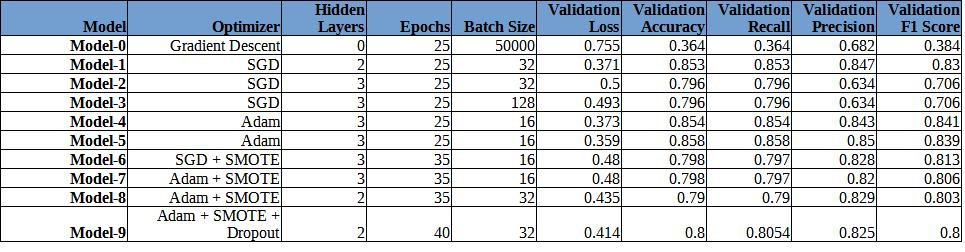

##Model Performance and comparison and Final Model Selection



Considering the fact that Recall and Precision are our two key factors, following are the observations:

**Model-5 (Adam Optimizer, 3 hidden layers, 25 epochs, Batch Size 16, Dropout):**

- Validation Loss: 0.359 (lowest among all models)
- Validation Accuracy: 0.858 (highest among all models)
- Validation Recall/Precision: 0.858/0.850 (both very strong)

**Conclusion:**Model-5 has the best recall and high precision, which is critical for our objective of minimizing false negatives (i.e. correctly identifying customers who are likely to churn).
- A higher recall means fewer false negatives, which aligns with your business goal.
- This model has the lowers validation loss amognst all the models.


**Model-4 (Adam Optimizer, 3 hidden layers, 25 epochs, Batch Size 16):**

 - Validation Loss: 0.373 (slightly higher than Model-5)
 - Validation Accuracy: 0.854
 - Validation Recall/Precision: 0.854/0.843

**Conclusion**: Model-4 also performs very well, with high recall and precision. However, Model-5 slightly outperforms it in validation loss and accuracy, likely due to dropout.

**Model-1 (SGD Optimizer, 2 hidden layers, 25 epochs, Batch Size 32)**

Validation Loss: 0.371 (close to Model-4 but higher than Model-5)
Validation Accuracy: 0.853
Validation Recall/Precision: 0.853/0.847

**Conclusion:** Model-1 with SGD performs well but slightly underperforms compared to Model-4 and Model-5 in terms of validation loss and accuracy. The recall and precision are still good but not the best.


**Model-7 (Adam + SMOTE, 3 hidden layers, 35 epochs, Batch Size 16):**

- Validation Loss: 0.480 (significantly higher than others)
- Validation Accuracy: 0.798 (lower compared to Models 4 and 5)
- Validation Recall/Precision: 0.797/0.820

**Conclusion:** While Model-7's recall and precision are still good, the high validation loss (0.480) and lower validation accuracy (0.798) make this model less preferable. SMOTE may have impacted the loss, potentially leading to overfitting or divergence.


**Model-9 (Adam + SMOTE + Dropout, 2 hidden layers, 35 epochs, Batch Size 32):**
- Validation Loss: 0.414 (better than Model-7 but still higher than Models 4 and 5)
- Validation Accuracy: 0.805
- Validation Recall/Precision: 0.805/0.824

**Conclusion:** This model, with SMOTE and dropout, has better validation loss than Model-7 but still higher than Models 4 and 5. The model is thrice slow as compared to Model-5. While recall and precision are balanced, this model's performance doesn't exceed Model-5.




**FINAL CHOSEN MODEL: MODEL-5(Adam Optimizer, 3 hidden layers, 25 epochs, Batch Size 16, Dropout)**

## Actionable Insights and Business Recommendations

**Business Insights#1 and Action: High Accurate Customer Prediction**

**Insights**: Using the Advance Neural Network Model-5 presented above, the bank can confidently predict customer churn with 85.8% accuracy. This allows the bank to identify customers at risk of leaving with a reliable degree of confidence

**Action**: Develop a targeted retention strategy based on the model's predictions, where customers flagged as high churn risk can be offered personalized retention offers, loyalty rewards, or interventions


**Key Business Insight #2: Balance Between Recall and Precision Can Optimize Costs**

**Insights**: The selected model (Model-5) balances high recall (85.8%) and precision (85.0%). This ensures that not only are we identifying a large portion of at-risk customers (high recall), but we are also accurate in our predictions (high precision). Focusing on recall reduces false negatives, ensuring that fewer churners are missed, while high precision helps avoid wasting resources on customers who were unlikely to churn.

**Action**: The bank should prioritize customer intervention programs that focus on customers identified by the model as high-risk, while also fine-tuning the threshold at which interventions are triggered to ensure cost-effective retention efforts.

**Key Business Insight #3 : Prioritizing Key Factors that Influence Churn for Product Development**

- Features such as Age, Geography, CreditScore, and Account Balance play a crucial role in predicting customer churn.
 **Insight**: The bank can use insights from the model to focus on developing new products and services that address the pain points or needs of customers with specific characteristics (e.g., customers with low credit scores or low balances).
**Action: **Introduce new services that cater to these segments—such as financial counseling for low-balance customers or tailored credit services for customers with low credit scores—thereby reducing churn and improving customer satisfaction.

**Key Business Insight #4 : Prioritizing Senior Citizens to stem the attrition**
- The Exited customer's age seems to be higher than the younger ones across all the countries
- Interestingly across all the countries, high volumes of senior citizens seems to be holding the account with the bank.
- In order to ensure that Senior citizens do continue to remain with the bank, the bank can possibly look into personalized retention offers speciically for Senior citizens.

**Key Business Insights Action #5: Increase adoption of more Banking Products**
 - We see from the data that the average number of banking products that the customer is using is 1.5. This is low. The bank should make efforts to market their internal products well to ensure customer adoption. This would indireclty have an impact on the customer attrition.

<font size=6 color='blue'>Power Ahead</font>
___